In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

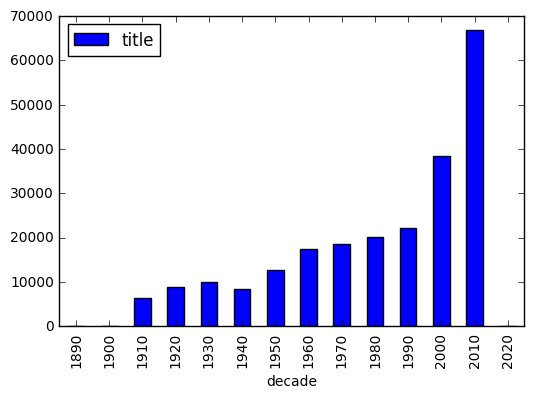

In [5]:
titles['decade'] = (titles.year // 10) * 10

titles.groupby(['decade']).count()[['title']].plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

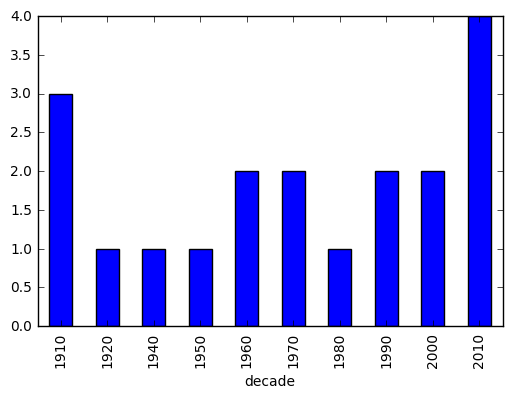

In [6]:
titles['decade'] = (titles.year // 10) * 10

titles[(titles.title == 'Hamlet')].groupby(['decade']).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year <= 1959)].groupby(['type','year']).size()

type     year
actor    1950    618
         1951    644
         1952    602
         1953    654
         1954    637
         1955    629
         1956    640
         1957    726
         1958    703
         1959    710
actress  1950    278
         1951    279
         1952    290
         1953    298
         1954    307
         1955    280
         1956    302
         1957    300
         1958    292
         1959    314
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [8]:
cast[(cast.n >= 1) & (cast.n <=5) & (cast.year >= 1950) & (cast.year <= 1959)].groupby(['type','n']).size()

type     n  
actor    1.0    6563
         2.0    4530
         3.0    5538
         4.0    5548
         5.0    5568
actress  1.0    2940
         2.0    4519
         3.0    3129
         4.0    2828
         5.0    2525
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [9]:
cast[cast.title.str.contains('Pink Panther')].groupby(['title']).count()[['character']]

,character
title,
Curse of the Pink Panther,67
Revenge of the Pink Panther,64
Son of the Pink Panther,46
The Pink Panther,108
The Pink Panther 2,82
The Pink Panther Strikes Again,73
The Return of the Pink Panther,30
Trail of the Pink Panther,40


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [37]:
cast[(cast.name == 'Frank Oz')].groupby(['title']).size() > 1

title
An American Werewolf in London                     True
Blues Brothers 2000                               False
Follow That Bird                                   True
Innocent Blood                                    False
Inside Out                                        False
Labyrinth                                         False
Monsters, Inc.                                    False
Muppet Treasure Island                             True
Muppets from Space                                 True
Spies Like Us                                     False
Star Wars: Episode I - The Phantom Menace         False
Star Wars: Episode II - Attack of the Clones      False
Star Wars: Episode III - Revenge of the Sith      False
Star Wars: Episode V - The Empire Strikes Back    False
Star Wars: Episode VI - Return of the Jedi        False
Star Wars: Episode VII - The Force Awakens        False
Star Wars: Episode VIII                           False
Superman III                              

### List each of the characters that Frank Oz has portrayed at least twice.

In [38]:
cast[(cast.name == 'Frank Oz')].groupby(['character']).size() >= 2

character
Animal                                                   True
Aughra, a Keeper Of Secrets (performer)                 False
Bert                                                     True
Brain Surgeon                                           False
Chamberlain (performer)                                 False
Cookie Monster                                           True
Corrections Officer                                     False
Corrupt Cop                                             False
Doc Hopper's Men                                        False
Fozzie                                                  False
Fozzie Bear                                              True
Fozzie Bear as Fozziewig                                False
Fungus                                                  False
George the Janitor                                      False
Gramps                                                  False
Grover                                                   Tru